In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
feature_sel_df = df.drop(columns=["koi_disposition"])

In [4]:
def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

#list(variance_threshold_selector(feature_sel_df, 0.5).columns)

In [5]:
list(variance_threshold_selector(feature_sel_df, 0.8).columns)

['koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_srad',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [ ]:
#list(variance_threshold_selector(feature_sel_df, 0.9).columns)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_srad',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
y = df["koi_disposition"] 

In [8]:
X_train, X_test, y_train, y_test = tts(selected_features, y, random_state=17)

In [9]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,...,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err2,ra,dec,koi_kepmag
2684,6.790121,138.088199,0.486,0.051,-0.095,6.04370,2302.3,5.7,-5.7,9.86,...,-122.30,526.1,6372,76,-89,2.001,-0.073,287.70883,47.333050,12.128
2307,14.034903,171.604910,0.660,0.037,-0.486,3.63800,851.8,15.9,-15.9,2.41,...,-11.97,60.9,5258,158,-142,0.785,-0.091,298.38483,46.276039,14.574
6452,9.524077,134.803805,0.313,0.005,-0.002,10.48910,198400.0,129.0,-129.0,151.00,...,-309.18,1942.5,5180,62,-72,3.371,-0.577,288.91531,39.804981,15.145
5361,8.467706,139.412302,1.054,0.016,-0.016,4.05376,77324.0,75.4,-75.4,43.98,...,-32.73,976.0,5873,146,-161,0.843,-0.083,287.12943,43.344131,14.408
5152,11.867172,142.985000,0.001,0.447,-0.001,4.81500,595.6,48.5,-48.5,4.03,...,-164.58,13.4,6264,177,-265,1.651,-0.451,294.55789,40.850498,14.624


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
X_scaler =  MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.596
k: 3, Train/Test Score: 0.787/0.609
k: 5, Train/Test Score: 0.731/0.610
k: 7, Train/Test Score: 0.718/0.592
k: 9, Train/Test Score: 0.705/0.604
k: 11, Train/Test Score: 0.701/0.608
k: 13, Train/Test Score: 0.691/0.617
k: 15, Train/Test Score: 0.688/0.613
k: 17, Train/Test Score: 0.682/0.613
k: 19, Train/Test Score: 0.676/0.619


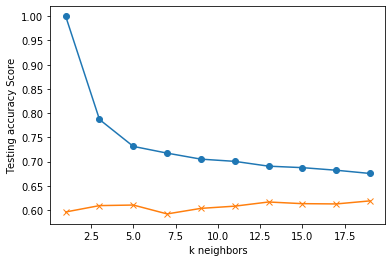

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
knn_train_scores = []
knn_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, encoded_y_train)
    train_score = knn.score(X_train_scaled, encoded_y_train)
    test_score = knn.score(X_test_scaled, encoded_y_test)
    knn_train_scores.append(train_score)
    knn_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), knn_train_scores, marker='o')
plt.plot(range(1, 20, 2), knn_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, encoded_y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, encoded_y_test))

k=13 Test Acc: 0.617


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
param_grid = {"n_neighbors": [1,3,5,7,9,11,13,15,17,19],
             "weights":["uniform", "distance"]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3, cv=3)

In [14]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=1, weights=uniform, score=0.574, total=   0.4s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.593, total=   0.4s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.591, total=   0.4s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.574, total=   0.3s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.593, total=   0.3s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.591, total=   0.3s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.591, total=   0.5s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.602, total=   0.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.578, total=   0.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   25.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 11, 'weights': 'distance'}
0.63341504691272


In [16]:
knn_model = KNeighborsClassifier(n_neighbors=11, weights="distance")

# Save the Model

In [17]:
# save the model
# and "your_model" with your model variable
filename = 'alissa_vee_knn.sav'
joblib.dump(knn_model, filename)

['alissa_vee_knn.sav']